# Imports

In [16]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Data Processing

In [17]:
logs = ['./reports/logs/lr_0.01/20220601_062727.log.json',
        './reports/logs/lr_0.005/20220530_031244.log.json',
        './reports/logs/lr_0.0025/20220603_213830.log.json',
        './reports/logs/lr_0.00125/20220605_174145.log.json']
        
learning_rates = ['0.01', '0.005', '0.0025', '0.00125']

temp = [] # temporary list of dataframes
for log, learning_rate in zip(logs, learning_rates):
    data = pd.read_json(log, lines=True)
    data['learning_rate'] = learning_rate # add learning rate column
    temp.append(data) 

temp = pd.concat(temp, ignore_index=True) # combines list of dataframes
df = temp[temp.isnull().sum(axis=1) < 24] # removes the first line of each json which contains the environmental info and seed

# Validation data only has secondary metrics (i.e precision, recall, etc), but training data only has loss (loss_rpn_cls, etc)
val_df = df[df['mode'] == 'val']
val_df = val_df.dropna(axis=1)
train_df = df[df['mode'] == 'train']
train_df = train_df.dropna(axis=1)

# For looking at plots of epochs specifically
# Dictionary of dataframes where the key specifies the epoch ie. train_epochs[1] would be a dataframe of just epoch 1
train_epochs = dict(iter(train_df.groupby('epoch')))
val_epochs = dict(iter(val_df.groupby('epoch')))

# track_AVERAGE_copypaste column processed into a dataframe if we want to look at that
val_column_names = ['IDF1', 'MOTA', 'MOTP', 'FP', 'FN', 'IDSw', 'Rcll', 'Prcn', 'MT', 'PT', 'ML', 'FM']
train_column_names = ['memory', 'data_time', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls', 'acc', 'loss_bbox', 'loss_track', 'loss_track_aux', 'loss', 'time']
bbox_column_names = ['bbox_mAP', 'bbox_mAP_50', 'bbox_mAP_75', 'bbox_mAP_s', 'bbox_mAP_m', 'bbox_mAP_l']
track_average = val_df['track_AVERAGE_copypaste'].tolist()
track_average_nums = np.array([[float(num) for num in elem.split()] for elem in track_average])
track_average_df = val_df.iloc[:, :3]
track_average_df[val_column_names] = track_average_nums
track_average_df = track_average_df.join(val_df[bbox_column_names])

In [18]:
val_df.head()

,mode,epoch,iter,lr,IDF1,MOTA,MOTP,FP,FN,IDSw,...,track_OVERALL_copypaste,track_AVERAGE_copypaste,bbox_mAP,bbox_mAP_50,bbox_mAP_75,bbox_mAP_s,bbox_mAP_m,bbox_mAP_l,bbox_mAP_copypaste,learning_rate
1081,val,2.0,39973.0,0.010,0.616,0.482,0.819,87245.0,126875.0,15442.0,...,0.616 0.482 0.819 87245 126875 15442 0.713 0.7...,0.364 0.156 0.687 87245 126875 15442 0.370 0.5...,0.227,0.410,0.218,0.102,0.254,0.354,0.227 0.410 0.218 0.102 0.254 0.354,0.01
2162,val,4.0,39973.0,0.010,0.632,0.514,0.825,73816.0,128092.0,13228.0,...,0.632 0.514 0.825 73816 128092 13228 0.711 0.8...,0.408 0.229 0.695 73816 128092 13228 0.393 0.6...,0.258,0.452,0.254,0.113,0.284,0.397,0.258 0.452 0.254 0.113 0.284 0.397,0.01
3243,val,6.0,39973.0,0.010,0.636,0.519,0.826,75199.0,125095.0,12719.0,...,0.636 0.519 0.826 75199 125095 12719 0.717 0.8...,0.418 0.244 0.696 75199 125095 12719 0.399 0.6...,0.262,0.458,0.261,0.109,0.291,0.421,0.262 0.458 0.261 0.109 0.291 0.421,0.01
4324,val,8.0,39973.0,0.010,0.646,0.549,0.832,53894.0,134268.0,11643.0,...,0.646 0.549 0.832 53894 134268 11643 0.697 0.8...,0.398 0.263 0.705 53894 134268 11643 0.355 0.7...,0.259,0.453,0.259,0.104,0.289,0.417,0.259 0.453 0.259 0.104 0.289 0.417,0.01
5405,val,10.0,39973.0,0.001,0.674,0.582,0.839,57792.0,117439.0,9815.0,...,0.674 0.582 0.839 57792 117439 9815 0.735 0.84...,0.461 0.295 0.707 57792 117439 9815 0.440 0.67...,0.301,0.505,0.303,0.126,0.327,0.481,0.301 0.505 0.303 0.126 0.327 0.481,0.01


In [19]:
train_df.head()

,mode,epoch,iter,lr,memory,data_time,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,loss_track,loss_track_aux,loss,time,learning_rate
1,train,1.0,50.0,0.0005,5880.0,0.52027,0.64711,0.08317,0.62459,87.20605,0.04852,0.30204,0.24299,1.94842,0.93667,0.01
2,train,1.0,100.0,0.0010,5880.0,0.00730,0.30206,0.07508,0.30410,92.85059,0.21121,0.22812,0.09202,1.21260,0.42791,0.01
3,train,1.0,150.0,0.0015,5880.0,0.00713,0.20709,0.07889,0.29025,92.61914,0.21287,0.15686,0.09432,1.04027,0.42897,0.01
4,train,1.0,200.0,0.0020,5880.0,0.00718,0.18510,0.07674,0.25843,92.69531,0.21484,0.15074,0.10173,0.98759,0.42982,0.01
5,train,1.0,250.0,0.0025,5881.0,0.00731,0.16327,0.07397,0.22425,93.61621,0.18211,0.12340,0.10396,0.87097,0.42868,0.01


# Metrics

In [20]:
def create_line_plots(data, x_axis, metrics, ncols=2, figsize=(16,9)):
    nrows = int(len(metrics)/ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, constrained_layout=True)
    for metric, ax in zip(metrics, axes.ravel()):
        sns.lineplot(data=data, x=x_axis, y=metric, hue='learning_rate', ax=ax, legend=False)
    fig.legend(labels = learning_rates, title='learning rate', bbox_to_anchor=(1.1,1))

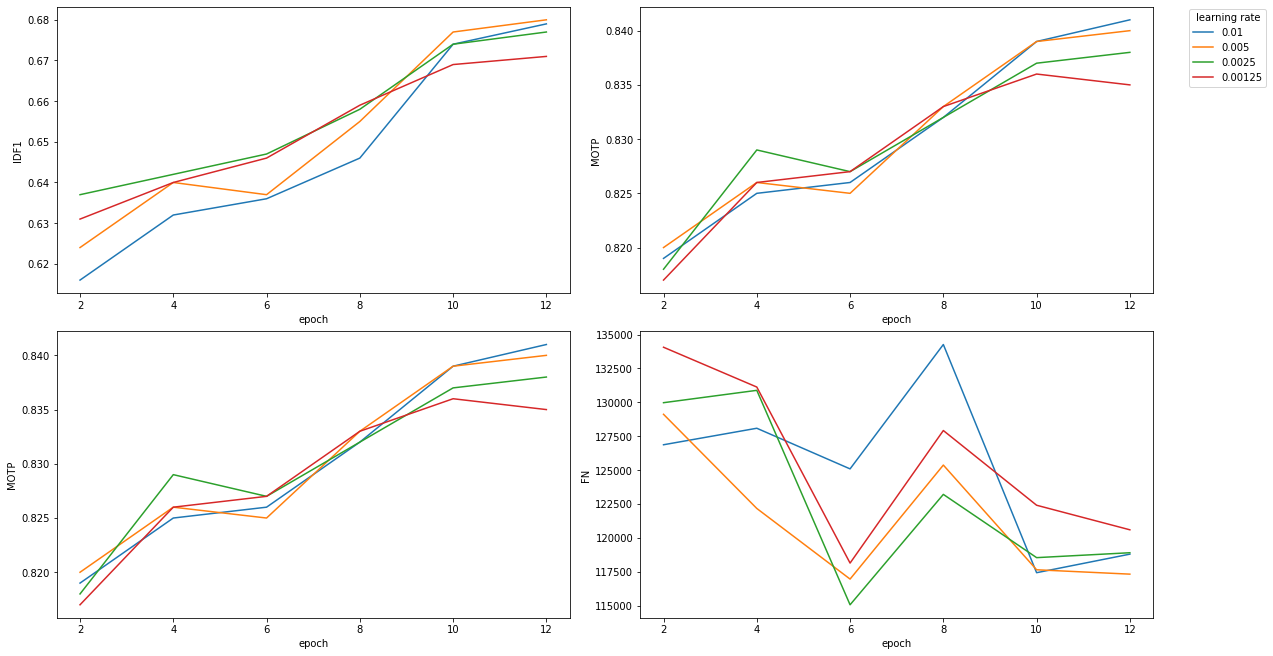

In [21]:
metric_names = ['IDF1', 'MOTP', 'MOTP', 'FN']
x_axis = 'epoch'
create_line_plots(data=val_df, x_axis=x_axis, metrics=metric_names, ncols=2, figsize=(16,9))

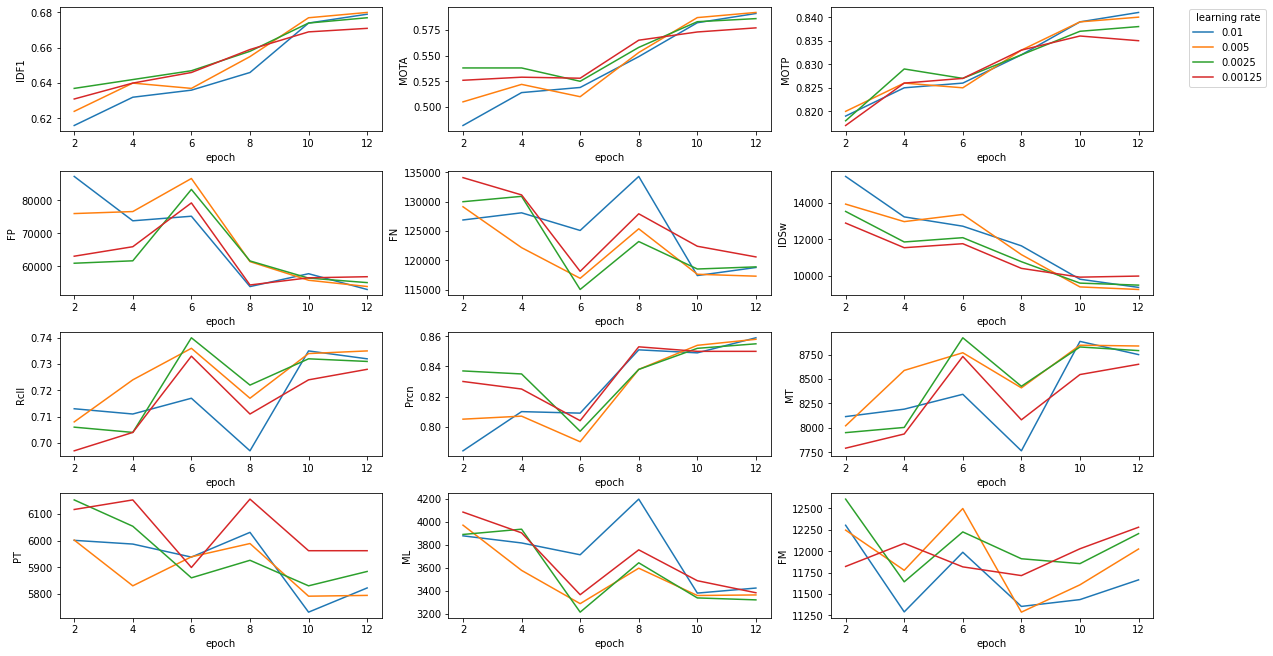

In [22]:
create_line_plots(data=val_df, x_axis=x_axis, metrics=val_column_names, ncols=3, figsize=(16,9))